In [8]:
import pandas as pd


data = pd.read_csv("http://people.bu.edu/kalathur/datasets/Fremont_Bridge_Hourly_Bicycle_Counts.csv",
                   index_col="Date", parse_dates=True)

data.columns = ["East", "West"]

data["Total"] = data.eval("East + West")

data.dropna(inplace=True)

data.head()

,East,West,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0


In [25]:
df1 = data.groupby([data.index.month, data.index.year])['Total'].sum()
df1.index.names = ['Month', 'Year']
df2 = df1.unstack()
df2

Year,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,
1,NaN,44884.0,59873.0,60630.0,51733.0,49805.0,58591.0,72883.0
2,NaN,50027.0,47025.0,58659.0,60381.0,42001.0,50677.0,36099.0
3,NaN,66089.0,63494.0,71144.0,69804.0,58747.0,77284.0,85457.0
4,NaN,71998.0,86855.0,83697.0,93639.0,68413.0,79947.0,87932.0
5,NaN,108574.0,118644.0,107775.0,114159.0,109089.0,129813.0,129123.0
6,NaN,99280.0,110907.0,113717.0,107617.0,107801.0,113145.0,132512.0
7,NaN,117974.0,120669.0,112780.0,105683.0,118904.0,128018.0,137714.0
8,NaN,104549.0,112490.0,103351.0,112380.0,120188.0,111809.0,142414.0
9,NaN,80729.0,97558.0,91140.0,94157.0,96498.0,96242.0,112174.0


In [27]:
df2 = df1.unstack().fillna(0)
df2

Year,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,
1,0.0,44884.0,59873.0,60630.0,51733.0,49805.0,58591.0,72883.0
2,0.0,50027.0,47025.0,58659.0,60381.0,42001.0,50677.0,36099.0
3,0.0,66089.0,63494.0,71144.0,69804.0,58747.0,77284.0,85457.0
4,0.0,71998.0,86855.0,83697.0,93639.0,68413.0,79947.0,87932.0
5,0.0,108574.0,118644.0,107775.0,114159.0,109089.0,129813.0,129123.0
6,0.0,99280.0,110907.0,113717.0,107617.0,107801.0,113145.0,132512.0
7,0.0,117974.0,120669.0,112780.0,105683.0,118904.0,128018.0,137714.0
8,0.0,104549.0,112490.0,103351.0,112380.0,120188.0,111809.0,142414.0
9,0.0,80729.0,97558.0,91140.0,94157.0,96498.0,96242.0,112174.0


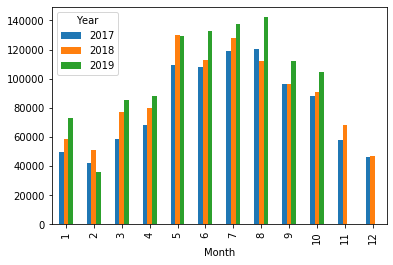

In [28]:
df2[[2017, 2018, 2019]].plot(kind='bar')

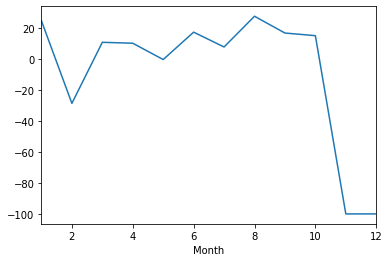

In [53]:
df3 = df1.unstack()
#df3.index [ calendar.month_abr[idx] for idx in df3.index ]
#df3[[2018, 2019]].pct_change(axis='columns') * 100
chg = (df2[2019] - df2[2018])/df2[2018] * 100
chg.plot()

fix, ax = plt.subplots(figsize=(12, 6))
x = chg.index[:10]
y = chg[:10]

colors = ['g' if _y >= 0 else 'r' for _y in y]
ax = sns.barplot(chg.index[:10], chg[:10], palette = colors)

for p in ax.patches:
    